# Lab 1 : Analysis of the link between the CAC40 and the and some other indices

In [243]:
import numpy as np, pandas as pd
print("NumPy OK from:", np.__file__)
print("Pandas:", pd.__version__)

NumPy OK from: /Users/hirecheariles/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/numpy/__init__.py
Pandas: 2.3.2


## EXERCISE 1: Application

In [244]:
df_cac = pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/Econométrie/LAB1/LAB1Data1.xlsx", sheet_name="CAC", index_col="DATE")
df_cac.head()

,RETURN
DATE,
1987M08,0.050088
1987M09,-0.050507
1987M10,-0.291422
1987M11,-0.055939
1987M12,0.058215


In [245]:
df_dj=pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/Econométrie/LAB1/LAB1Data1.xlsx", sheet_name='DJ', index_col="DATE")
df_dj.head()

,RETURN
DATE,
1960M02,0.012046
1960M03,-0.021472
1960M04,-0.024149
1960M05,0.039572
1960M06,0.024157


In [246]:
df_eur=pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/Econométrie/LAB1/LAB1Data1.xlsx", sheet_name='EURO', index_col="DATE")
df_eur.head()

,RETURN
DATE,
1987M02,-0.020306
1987M03,0.029762
1987M04,0.009909
1987M05,-0.025859
1987M06,0.029378


In [247]:
df_snp=f_dj=pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/Econométrie/LAB1/LAB1Data1.xlsx", sheet_name='SandP', index_col="DATE")
df_snp.head()

,RETURN
DATE,
1957M04,0.035052
1957M05,0.034081
1957M06,0.016270
1957M07,-0.036946
1957M08,-0.065004


1. Fill-up the table below:

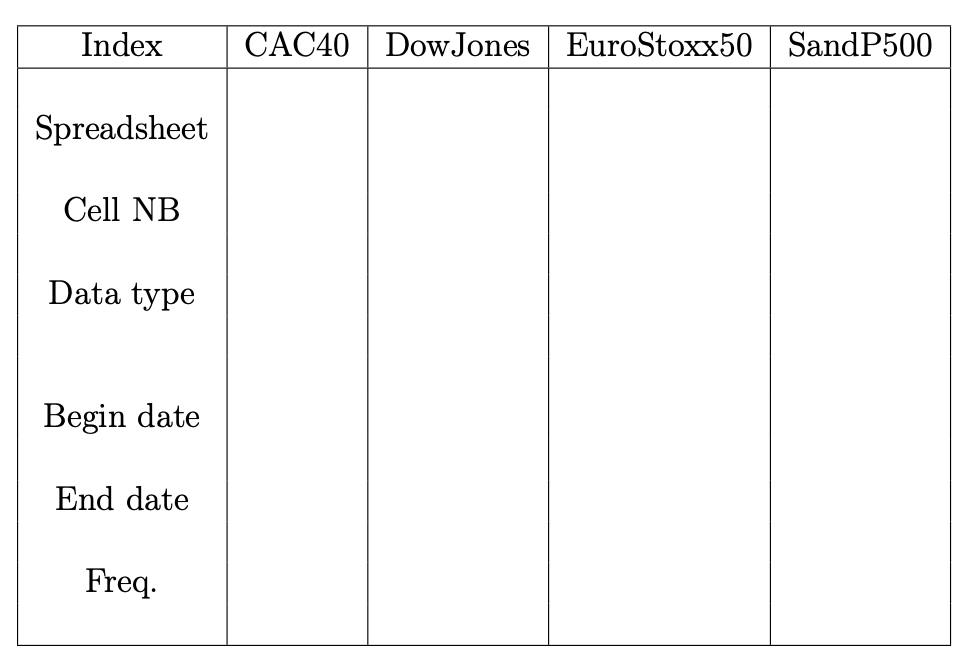

In [248]:
summary={
    "Index":["Spreadsheet", "Cell NB", "Data type", "Begin date", "End date", "Freq."],
    "CAC40":[1, len(df_cac),  df_cac["RETURN"].dtype, df_cac.index[0], df_cac.index[-1], "Monthly"],
    "DowJones":[3, len(df_dj),  df_dj["RETURN"].dtype, df_dj.index[0], df_dj.index[-1], "Monthly"],
    "EuroStoxx50":[2, len(df_eur), df_eur["RETURN"].dtype, df_eur.index[0], df_eur.index[-1], "Montly"],
    "SandP500":[4, len(df_snp),  df_snp["RETURN"].dtype, df_snp.index[0], df_snp.index[-1], "Monthly"]
} 
df = pd.DataFrame(summary)
df.set_index(df.columns[0])

,CAC40,DowJones,EuroStoxx50,SandP500
Index,,,,
Spreadsheet,1,3,2,4
Cell NB,385,715,391,749
Data type,float64,float64,float64,float64
Begin date,1987M08,1960M02,1987M02,1957M04
End date,2019M08,2019M08,2019M08,2019M08
Freq.,Monthly,Monthly,Montly,Monthly


2. Load the first file into Gretl (or R), define the date format and save the file as a Gretl or an R database, called "CAC". Do the same for the second file.

In [249]:
#CAC = pd.read_excel(...) - (already done above)

3. From the smallest database, append the data of the other data base. What happen if
you do the reverse (from the largest data base, append the other data base) ?

In [250]:
#df_cac.rename({"RETURN":"CAC"}, axis=1, inplace=True)
#df_eur.rename({"RETURN":"EUR"}, axis=1, inplace=True)
#merged = pd.concat([df_cac, df_eur], axis=1)
#merged.head()

In [251]:
ndf = df_cac
ndf["EUR"] = df_eur["RETURN"]
ndf = ndf.rename(columns={"RETURN":"CAC"})
ndf

,CAC,EUR
DATE,,
1987M08,0.050088,-0.000483
1987M09,-0.050507,-0.015379
1987M10,-0.291422,-0.216994
1987M11,-0.055939,-0.086815
1987M12,0.058215,-0.021569
...,...,...
2019M04,-0.009904,0.045294
2019M05,-0.006477,-0.066978
2019M06,0.038400,0.050158


4. Plot the evolution of the two indices from the beginning of the year 2008 to the end of the year 2018.

In [252]:
# np.where allows to find the indexes where index="2018M01" in ndf
i2008 = np.where(ndf["CAC"].index=="2008M01")[0][0]

i2018 = np.where(ndf.index=="2019M01")[0][0]
i2018

np.int64(377)

In [253]:
#cac2008, eur2008, cac2018, eur2018 = (0, 0, 0, 0)
#
#for a, b in zip([cac2008, eur2008, cac2018, eur2018], [i_cac2008, i_eur2008, i_cac2018, i_eur2018]):
#    a = df_cacXeur["RETURN"][b]
#    print(a)

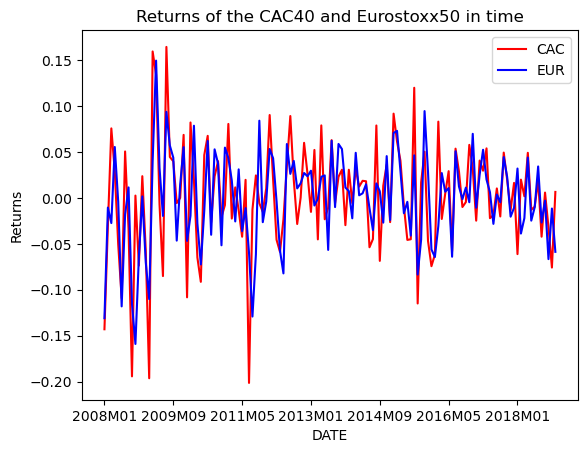

In [254]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()

ndf["CAC"].iloc[i2008:i2018].plot(color="red", ax=ax)
ndf["EUR"].iloc[i2008:i2018].plot(color="blue", ax=ax)
plt.title("Returns of the CAC40 and Eurostoxx50 in time")
plt.ylabel("Returns")
plt.legend();

5. Do a scatter plot of the two indexes (CAC40 on the y-axis, EuroStoxx on the x-axis).
Explain why we look at that relation.

Plotting this relation allows us to see broadly if there is any correlation between the CAC40 and EUROSTOXX data during this period.


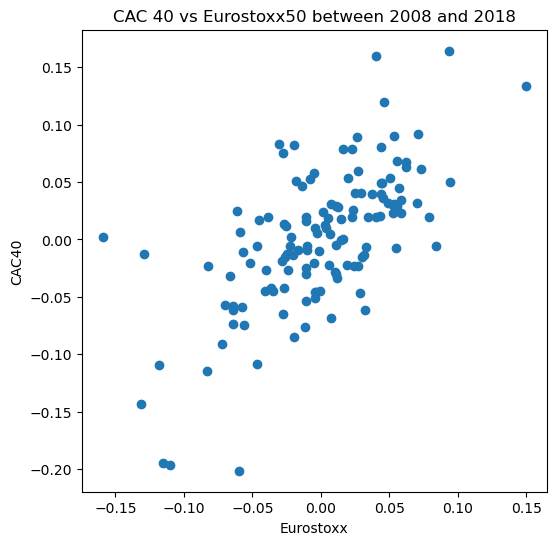

In [255]:
plt.figure(figsize=(6,6))

plt.scatter(ndf["EUR"][i2008:i2018], ndf["CAC"][i2008:i2018])
plt.title("CAC 40 vs Eurostoxx50 between 2008 and 2018")
plt.xlabel("Eurostoxx")
plt.ylabel("CAC40")

print("Plotting this relation allows us to see broadly if there is any correlation between the CAC40 and EUROSTOXX data during this period.");

6. Compute the sum of
(a) the CAC40 returns and its square,
(b) the EurostoXX50 returns and its square,
(c) the EurostoXX50-CAC40 cross product.

In [256]:
ndf8 = ndf[i2008:i2018]
ndf8

,CAC,EUR
DATE,,
2008M01,-0.143025,-0.130971
2008M02,-0.030291,-0.010539
2008M03,0.075695,-0.027385
2008M04,0.029086,0.055448
2008M05,-0.050677,-0.004232
...,...,...
2018M08,-0.042216,-0.026756
2018M09,0.005811,-0.002952
2018M10,-0.031848,-0.066646


In [257]:
#a)
cac_sum = sum(ndf8["CAC"])
cacsq_sum = sum(ndf8["CAC"]**2)
print(cac_sum)
print(cacsq_sum)
#b)
eur_sum = sum(ndf8["EUR"])
eursq_sum = sum(ndf8["EUR"]**2)
print(eur_sum)
print(eursq_sum)
#c)
eurXcac_sum = sum(ndf8["CAC"]*ndf8["EUR"])
print(eurXcac_sum)

0.1085922868924608
0.4849266327940875
-0.06430261784805752
0.3319792555205258
0.262128592547151


7. From the previous sums, compute the estimated parameters of a simple regression of the CAC40 on the EuroStoXX50, and the associated standard errors.

In [258]:
T = len(ndf8)
ybar=ndf8["CAC"].mean()
xbar=ndf8["EUR"].mean()
print('Ybar =', ybar)
print("Xbar =", xbar, "\n")

b1est = (eurXcac_sum - (T*ybar*xbar))/(eursq_sum-(T*(xbar**2)))
print("Beta1 hat :",b1est)
b0est = ybar-(b1est*xbar)
print("Beta0 hat :",b0est, "\n")

ndf8["PRED"]= b0est+(b1est*ndf8["EUR"])
u_bar = ybar - (b0est + b1est*xbar)
print("Mean of uhat =", u_bar)

print((ndf8["CAC"]-ndf8["PRED"]).var(), "\n")
varu = (1/(T-2))*sum((ndf8["CAC"]-ndf8["PRED"])**2)
print("std(u) =", varu**0.5)

varb1h = varu/(eursq_sum-(T*(xbar**2))) 
print("std(B1) =", varb1h**0.5)

varb0h = varu*((1/T)+(xbar**2/(eursq_sum-(T*(xbar**2)))))
print("std(B0) =", varb0h**0.5)

Ybar = 0.0008226688400944005
Xbar = -0.0004871410443034667 

Beta1 hat : 0.7898271619203817
Beta0 hat : 0.0012074260685715386 

Mean of uhat = 0.0
0.0021202994910408195 

std(u) = 0.046223473334721925
std(B1) = 0.08022830061563396
std(B0) = 0.0040234267670966285


/var/folders/hp/sw6ymv615g37tbqbjqnw49qh0000gn/T/ipykernel_16805/3992447850.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf8["PRED"]= b0est+(b1est*ndf8["EUR"])


8. With a Gretl command (or R), estimate the simple regression model and check the
values computed in the previous question.

In [267]:
import statsmodels.api as sm

y=ndf8["CAC"]
X=ndf8["EUR"]
ols = sm.OLS(y,sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CAC   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     96.92
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.99e-17
Time:                        13:10:50   Log-Likelihood:                 219.51
No. Observations:                 132   AIC:                            -435.0
Df Residuals:                     130   BIC:                            -429.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.004      0.300      0.765      -0.007       0.009
EUR            0.7898      0.080      9.845      0.000       0.631       0.949
==============================================================================
Omnibus:                        4.134   Durbin-Watson:                   2.808
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                5.053
Skew:                           0.086   Prob(JB):                       0.0800
Kurtosis:                       3.943   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
print("Beta0hat =",ols.params.iloc[0], "\nBeta1hat =", ols.params.iloc[1])
print("Std(B0) =",ols.bse.iloc[0], "\nStd(B1) =", ols.bse.iloc[1])
print("Std(u) =", ols.mse_resid**0.5)

Beta0hat = 0.0012074260685715327 
Beta1hat = 0.7898271619203816
Std(B0) = 0.004023426767096628 
Std(B1) = 0.08022830061563396
Std(u) = 0.046223473334721925


9. What are the assumptions that must be checked prior to interpreting the results?

In [261]:
print("H1: Sum of the errors = 0\nH2: Homoskedasticity")
print("H3: Exogeneity of the explanatory variable\nH4: Non autocorrelation of the errors")
print("H5 (for statistical inference): Normality of the errors")

H1: Sum of the errors = 0
H2: Homoskedasticity
H3: Exogeneity of the explanatory variable
H4: Non autocorrelation of the errors
H5 (for statistical inference): Normality of the errors


10. Supposing that the above assumptions hold, interpret the results. What will happen if they do not?

In [262]:
import textwrap

print(textwrap.fill("If they hold, it means that accoring to our sample estimations, if the Eurostoxx's return increases by 0.01, "
      "CAC40's one will increase by 0.007898.", width=80))
print("It would also mean that if Eurostoxx return is null, the one of CAC40 would be 0.12%.")


If they hold, it means that accoring to our sample estimations, if the
Eurostoxx's return increases by 0.01, CAC40's one will increase by 0.007898.
It would also mean that if Eurostoxx return is null, the one of CAC40 would be 0.12%.


## EXERCISE 2: Statistical inference and prediction

1. Test the hypothesis that the coefficient associated with the constant is zero.

(a) Compute the test statistics.

In [263]:
#We use the estimated value and standard deviation of Beta0
statb0=ols.params.iloc[0]/(ols.bse.iloc[0])
print(statb0)

0.3000989302069071


(b) Using the pvalue command (look for the Gretl Help to get the caracteristics of
such command), get the pvalue of the test and interpret the result. Can we use
the fonction $pvalue instead ? Do it if the answer is yes and explain otherwise.

In [284]:
from scipy.stats import t

dof=T-2
pval0 = 2*(1-t.cdf(abs(statb0), dof)) #We multiply by 2 since it is a 2 sided test
print(pval)

0.7645810351672047


(c) Verify the results of the previous question in the simple regression table.

In [285]:
print(ols.pvalues.iloc[0])

0.7645810351672048


2. Test the hypothesis that the coefficient associated with the Eurostoxx return is equal
to one.

(a) Compute the test statistics.

In [286]:
statb1= (ols.params.iloc[1]-1)/ols.bse.iloc[1]
statb1

np.float64(-2.6196845311050043)

(b) Using the critical value finder of Gretl, calculate the p-value of this test and
interpret.

In [291]:
pval1 = 2 * (1-t.cdf(abs(statb1), dof))
print("The p-value of Beta1 significance test is", pval1,
     ",therefore we reject the null hypothesis at 1% and conclude that Beta 1",
     "is statistically different from 0")

The p-value of Beta1 significance test is 0.009848068140177135 ,therefore we reject the null hypothesis at 1% and conclude that Beta 1 is statistically different from 0


3. We want to construct a confidence interval around the estimated parameters.

(a) Using the Gretl function critical(t,df,α/2) that gives the critical value for a
Student t-distribution with df degres of freedom for a confidence level α, calculate
a confidence interval around each estimated parameter.

In [314]:
tcal=abs(t.ppf(0.005, dof))
print("For a Student t law with", dof, 
      "degrees of freedom, the critical value at a 1% threshold for a 2 sided test is",
      tcal)

For a Student t law with 130 degrees of freedom, the critical value at a 1% threshold for a 2 sided test is 2.614177237556348


(b) Use the Gretl menu Tools to get critical values.

(c) Use the Gretl menu Analysis to construct a confidence interval around the estimated parameters.

In [315]:
upper0 = ols.params.iloc[0]+(tcal*ols.bse.iloc[0])
lower0 = ols.params.iloc[0]-(ols.bse.iloc[0]*tcal)
upper1 = ols.params.iloc[1]+(tcal*ols.bse.iloc[1])
lower1 = ols.params.iloc[1]-(tcal*ols.bse.iloc[1])

print("The confidence interval at a 1% level of confidence of Beta0 is [",
     lower0.round(4), ",", upper0.round(4), "]",
      "and for Beta1 it's [", lower1.round(4), ",", upper1.round(4), "]")

The confidence interval at a 1% level of confidence of Beta0 is [ -0.0093 , 0.0117 ] and for Beta1 it's [ 0.5801 , 0.9996 ]


4. Create a scatterplot of the CAC40 predicted by the model and the observed one.

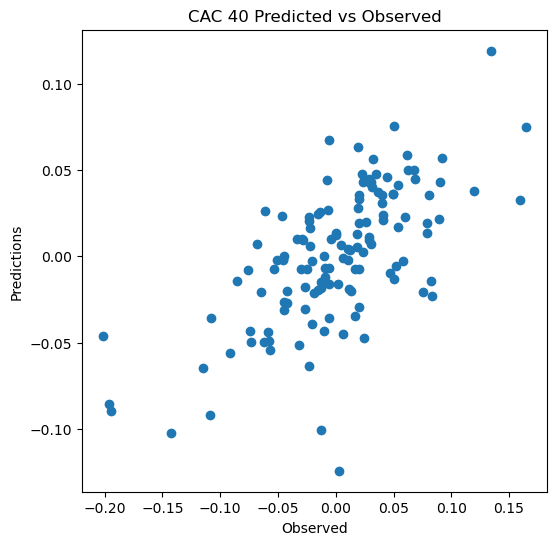

In [328]:
plt.figure(figsize=(6,6))

plt.scatter(ndf8["CAC"], ols.fittedvalues)
plt.title("CAC 40 Predicted vs Observed")
plt.ylabel("Predictions")
plt.xlabel("Observed");

In [324]:
ols.predict(sm.add_constant(ndf8["EUR"]))

DATE
2008M01   -0.102237
2008M02   -0.007117
2008M03   -0.020422
2008M04    0.045002
2008M05   -0.002135
             ...   
2018M08   -0.019925
2018M09   -0.001124
2018M10   -0.051431
2018M11   -0.007920
2018M12   -0.045166
Length: 132, dtype: float64

5. Over the year 2019 (for which we have an observation), Use the Gretl menu Analysis
to propose an analysis of the forecast of CAC40 return (in-sample prediction).

In [381]:
# Selecting a subset of our dataframe

df8_19=ndf.loc["2008":]
df8_19[-8:]

,CAC,EUR
DATE,,
2019M01,0.039464,0.060976
2019M02,0.054333,0.040141
2019M03,0.045985,0.012220
2019M04,-0.009904,0.045294
2019M05,-0.006477,-0.066978
2019M06,0.038400,0.050158
2019M07,-0.036003,0.000293
2019M08,0.037304,-0.013460


In [390]:
# Initialising and fitting our model to the data

mdl19 = sm.OLS(df8_19["CAC"], sm.add_constant(df8_19["EUR"])).fit()
mdl19.fittedvalues[-8:]

DATE
2019M01    0.048821
2019M02    0.032681
2019M03    0.011051
2019M04    0.036672
2019M05   -0.050301
2019M06    0.040441
2019M07    0.001811
2019M08   -0.008842
dtype: float64

In [388]:
residuals = mdl19.resid[-8:]
residuals

DATE
2019M01   -0.009358
2019M02    0.021652
2019M03    0.034934
2019M04   -0.046576
2019M05    0.043824
2019M06   -0.002040
2019M07   -0.037815
2019M08    0.046146
dtype: float64

In [405]:
print("The average error on the in-sample prediction of 2019 is of", 
      residuals.mean().round(6))

The average error on the prediction of 2019 is of 0.006346


### Bonus questions
EX2.1 How would you do an out-of-sample prediction for 2019? What do we get?

In [408]:
# The "ols" model is already on the out-of-sample data (without 2019)

predictions = ols.predict(sm.add_constant(ndf["EUR"].loc["2019":]))
residuals = ndf["CAC"].loc["2019":] - predictions
residuals

DATE
2019M01   -0.009904
2019M02    0.021421
2019M03    0.035126
2019M04   -0.046885
2019M05    0.045216
2019M06   -0.002423
2019M07   -0.037442
2019M08    0.046727
dtype: float64

In [410]:
print("The average error for the out-of-sample estimation of the CAC in 2019 is",
     residuals.mean().round(6))

The average error for the out-of-sample estimation of the CAC in 2019 is 0.006479
